# <font color='#FFE15D'>**Week 5:  Model Selection ❌✔️❌**</font>

## **🔸 Imports**

In [1]:
import joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, GridSearchCV, RandomizedSearchCV

from mlxtend.evaluate import bias_variance_decomp

## **🔸 Learning Curve (Scratch)**

### Functions

In [2]:
def polynomial(x):
    phi_x = np.array([x**i for i in range(d+1)])
    phi_x = phi_x[..., 0].T
    return phi_x

In [3]:
def linear_regression(x, w):
    y_hat = x @ w
    return y_hat

In [4]:
def mse(y, y_hat):
    loss = np.mean((y - y_hat)**2)
    return loss

In [5]:
def gradient(x, y, y_hat):
    grads = 2*(x.T @ (y_hat - y)) / y.shape[0]
    return grads

In [6]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

In [7]:
def mae(y, y_hat):
    loss = np.mean(np.abs(y - y_hat))
    return loss

In [8]:
def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

### Load Dataset

In [9]:
df = pd.read_csv('data/energy-train-s.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv('data/energy-test-s.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29, 1), (29, 1), (50, 1), (50, 1))

In [10]:
d = 2
phi_x_train = polynomial(x_train)
phi_x_test = polynomial(x_test)

phi_x_train.shape, phi_x_test.shape

((29, 3), (50, 3))

### Initialization

In [46]:
w = np.random.randn(d+1, 1)
print(w)

eta = 0.01
n_epochs = 2000

[[ 0.42954212]
 [ 0.98310028]
 [-1.17950085]]


### Train

In [47]:
error_train_hist, error_test_hist = [], []
score_train_hist, score_test_hist = [], []

for epoch in range(n_epochs):
    # predictions
    y_hat = linear_regression(phi_x_train, w)
    
    # loss
    e = mse(y_train, y_hat)
    error_train_hist.append(e)  # loss train
    
    # gradients
    grads = gradient(phi_x_train, y_train, y_hat)
    
    # gradient descent
    w = gradient_descent(w, eta, grads)
    
    # evaluation
    y_hat_test = linear_regression(phi_x_test, w)
    e = mse(y_hat_test, y_test)
    error_test_hist.append(e)  # loss test
    # metric test
    s = r2(y_test, y_hat_test)
    score_test_hist.append(s)
    # metric train
    s = r2(y_train, y_hat)
    score_train_hist.append(s)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t Loss_train={error_train_hist[epoch]:.4},\t Loss_test={error_test_hist[epoch]:.4}, \t Score_train={score_train_hist[epoch]:.4},\t Score_test={score_test_hist[epoch]:.4},\t w={w.T[0]}')

Epoch=99, 	 Loss_train=0.4923,	 Loss_test=0.3279, 	 Score_train=0.5077,	 Score_test=0.4649,	 w=[-0.01590427  0.48824249  0.32770582]
Epoch=199, 	 Loss_train=0.2157,	 Loss_test=0.2122, 	 Score_train=0.7843,	 Score_test=0.6538,	 w=[-0.4488708   0.44124806  0.5888544 ]
Epoch=299, 	 Loss_train=0.1623,	 Loss_test=0.2321, 	 Score_train=0.8377,	 Score_test=0.6213,	 w=[-0.64120378  0.44173926  0.70326214]
Epoch=399, 	 Loss_train=0.1517,	 Loss_test=0.2544, 	 Score_train=0.8483,	 Score_test=0.5849,	 w=[-0.72654161  0.44478615  0.75409951]
Epoch=499, 	 Loss_train=0.1496,	 Loss_test=0.2669, 	 Score_train=0.8504,	 Score_test=0.5645,	 w=[-0.76444799  0.44651532  0.77669215]
Epoch=599, 	 Loss_train=0.1492,	 Loss_test=0.273, 	 Score_train=0.8508,	 Score_test=0.5545,	 w=[-0.7812915   0.44733352  0.78673256]
Epoch=699, 	 Loss_train=0.1492,	 Loss_test=0.2758, 	 Score_train=0.8508,	 Score_test=0.5499,	 w=[-0.78877661  0.44770374  0.79119463]
Epoch=799, 	 Loss_train=0.1491,	 Loss_test=0.2771, 	 Score_train

#### Alternative

In [ ]:
loss_train_hist, loss_test_hist = [], []
score_train_hist, score_test_hist = [], []

for epoch in range(n_epochs):
    # predictions
    y_hat = linear_regression(phi_x_train, w)
    
    # loss
    loss_train = mse(y_train, y_hat)
    loss_train_hist.append(loss_train)  # loss train
    
    # gradients
    grads = gradient(phi_x_train, y_train, y_hat)
    
    # gradient descent
    w = gradient_descent(w, eta, grads)
    
    # evaluation
    y_hat_test = linear_regression(phi_x_test, w)
    loss_test = mse(y_hat_test, y_test)
    loss_test_hist.append(loss_test)  # loss test
    # metric test
    score_test = r2(y_test, y_hat_test)
    score_test_hist.append(score_test)
    # metric train
    score_train = r2(y_train, y_hat)
    score_train_hist.append(score_train)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t Loss_train={loss_train:.4},\t Loss_test={loss_test:.4}, \t Score_train={score_train:.4},\t Score_test={score_test:.4},\t w={w.T[0]}')

### Learning curve

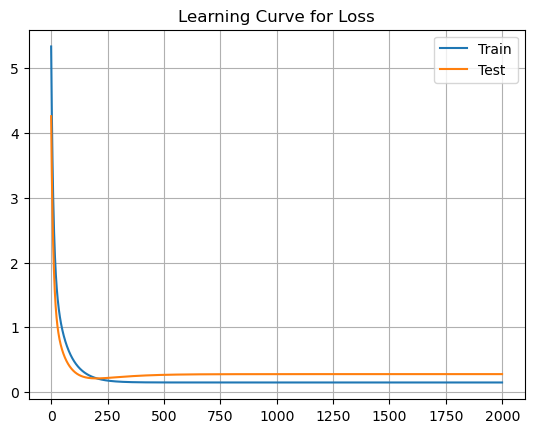

In [48]:
plt.plot(error_train_hist, label='Train')
plt.plot(error_test_hist, label='Test')
plt.legend()
plt.grid()
plt.title('Learning Curve for Loss');

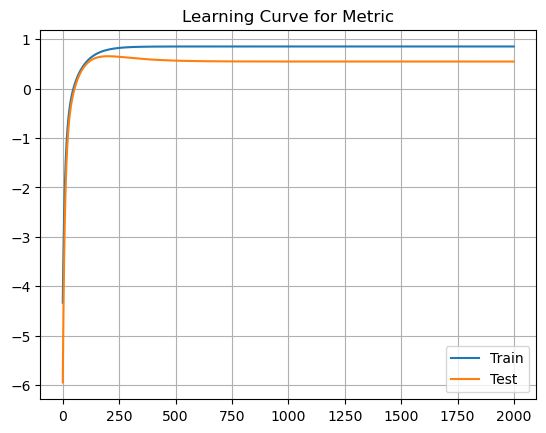

In [49]:
plt.plot(score_train_hist, label='Train')
plt.plot(score_test_hist, label='Test')
plt.legend()
plt.grid()
plt.title('Learning Curve for Metric');

## **🔸 Learning Curve (sklearn)**

In [51]:
df = pd.read_csv('data/energy-train-s.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv('data/energy-test-s.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29, 1), (29, 1), (50, 1), (50, 1))

In [65]:
lr = 0.01
n_epochs = 3000

polynomial = PolynomialFeatures(degree=1)
model = SGDRegressor(eta0=lr)

# polynomial
x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.transform(x_test)

loss_train_hist, loss_test_hist = [], []
for epoch in range(n_epochs):
    # fit
    model.partial_fit(x_train_poly, y_train.ravel())
    
    # prediction (train)
    y_hat = model.predict(x_train_poly)
    loss_train = mean_absolute_error(y_hat, y_train)
    loss_train_hist.append(loss_train)
    
    # prediction (test)
    y_hat = model.predict(x_test_poly)
    loss_test = mean_absolute_error(y_hat, y_test)
    loss_test_hist.append(loss_test)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t Loss_train={loss_train:.4},\t Loss_test={loss_test:.4}')
        
print(f'Model weights: {model.coef_}')

Epoch=99, 	 Loss_train=0.7691,	 Loss_test=0.5487
Epoch=199, 	 Loss_train=0.7691,	 Loss_test=0.5487
Epoch=299, 	 Loss_train=0.7688,	 Loss_test=0.5483
Epoch=399, 	 Loss_train=0.769,	 Loss_test=0.5486
Epoch=499, 	 Loss_train=0.769,	 Loss_test=0.5485
Epoch=599, 	 Loss_train=0.769,	 Loss_test=0.5485
Epoch=699, 	 Loss_train=0.769,	 Loss_test=0.5485
Epoch=799, 	 Loss_train=0.7689,	 Loss_test=0.5485
Epoch=899, 	 Loss_train=0.7689,	 Loss_test=0.5484
Epoch=999, 	 Loss_train=0.7689,	 Loss_test=0.5484
Epoch=1099, 	 Loss_train=0.7689,	 Loss_test=0.5484
Epoch=1199, 	 Loss_train=0.769,	 Loss_test=0.5485
Epoch=1299, 	 Loss_train=0.7689,	 Loss_test=0.5485
Epoch=1399, 	 Loss_train=0.7689,	 Loss_test=0.5484
Epoch=1499, 	 Loss_train=0.769,	 Loss_test=0.5485
Epoch=1599, 	 Loss_train=0.7689,	 Loss_test=0.5484
Epoch=1699, 	 Loss_train=0.7689,	 Loss_test=0.5484
Epoch=1799, 	 Loss_train=0.7689,	 Loss_test=0.5484
Epoch=1899, 	 Loss_train=0.7689,	 Loss_test=0.5484
Epoch=1999, 	 Loss_train=0.7689,	 Loss_test=0.54

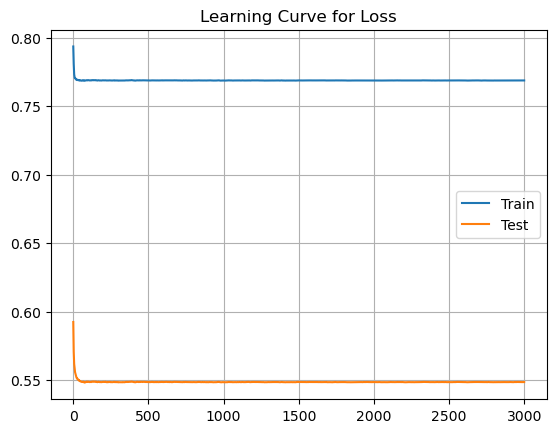

In [66]:
plt.plot(loss_train_hist, label='Train')
plt.plot(loss_test_hist, label='Test')
plt.legend()
plt.grid()
plt.title('Learning Curve for Loss');

## **🔸 Underfit, Goodfit & Overfit**

In [12]:
df = pd.read_csv('data/energy-train-s.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv('data/energy-test-s.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29, 1), (29, 1), (50, 1), (50, 1))

In [53]:
lr = 0.00001
n_epochs = 10000
d = 10

polynomial = PolynomialFeatures(degree=d)
model = SGDRegressor(eta0=lr)

# polynomial
x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.transform(x_test)

loss_train_hist, loss_test_hist = [], []
for epoch in range(n_epochs):
    # fit
    model.partial_fit(x_train_poly, y_train.ravel())
    
    # prediction (train)
    y_hat = model.predict(x_train_poly)
    loss_train = mean_absolute_error(y_hat, y_train)
    loss_train_hist.append(loss_train)
    
    # prediction (test)
    y_hat = model.predict(x_test_poly)
    loss_test = mean_absolute_error(y_hat, y_test)
    loss_test_hist.append(loss_test)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t Loss_train={loss_train:.4},\t Loss_test={loss_test:.4}')
        
print(f'Model weights: {model.coef_}')

Epoch=99, 	 Loss_train=0.5622,	 Loss_test=0.6959
Epoch=199, 	 Loss_train=0.5593,	 Loss_test=0.6796
Epoch=299, 	 Loss_train=0.5568,	 Loss_test=0.6642
Epoch=399, 	 Loss_train=0.5546,	 Loss_test=0.6509
Epoch=499, 	 Loss_train=0.5525,	 Loss_test=0.6382
Epoch=599, 	 Loss_train=0.5506,	 Loss_test=0.6274
Epoch=699, 	 Loss_train=0.5487,	 Loss_test=0.6161
Epoch=799, 	 Loss_train=0.5469,	 Loss_test=0.6076
Epoch=899, 	 Loss_train=0.5452,	 Loss_test=0.5967
Epoch=999, 	 Loss_train=0.5436,	 Loss_test=0.5902
Epoch=1099, 	 Loss_train=0.5421,	 Loss_test=0.5801
Epoch=1199, 	 Loss_train=0.5404,	 Loss_test=0.5725
Epoch=1299, 	 Loss_train=0.5389,	 Loss_test=0.5654
Epoch=1399, 	 Loss_train=0.5375,	 Loss_test=0.5563
Epoch=1499, 	 Loss_train=0.5361,	 Loss_test=0.548
Epoch=1599, 	 Loss_train=0.5347,	 Loss_test=0.5414
Epoch=1699, 	 Loss_train=0.5333,	 Loss_test=0.5347
Epoch=1799, 	 Loss_train=0.532,	 Loss_test=0.5281
Epoch=1899, 	 Loss_train=0.5307,	 Loss_test=0.5209
Epoch=1999, 	 Loss_train=0.5294,	 Loss_test=

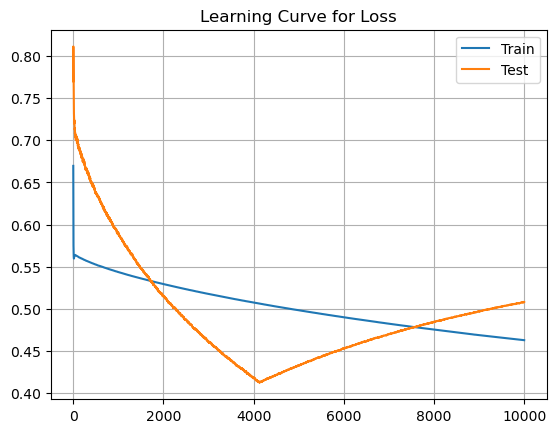

In [54]:
plt.plot(loss_train_hist, label='Train')
plt.plot(loss_test_hist, label='Test')
plt.legend()
plt.grid()
plt.title('Learning Curve for Loss');
# plt.ylim([0.26, 0.41])

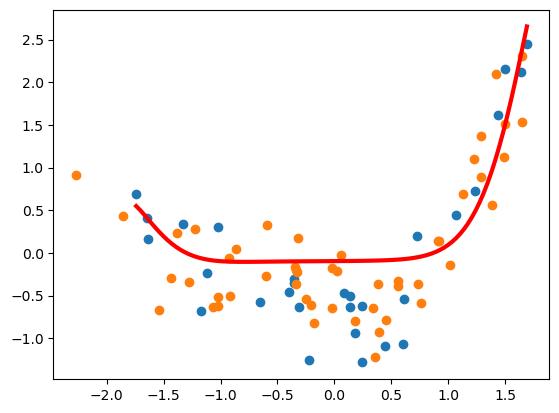

In [55]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial.transform(x)
y_hat = model.predict(xp)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x, y_hat, 'r', linewidth=3)

In [56]:
a = np.array(loss_test_hist)
a.argmin(), a.min()

(4134, 0.4126229446995464)

## **🔸 Early Stopping**

### Scratch

In [271]:
df = pd.read_csv('data/energy-train-s.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv('data/energy-test-s.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29, 1), (29, 1), (50, 1), (50, 1))

In [293]:
lr = 0.0005
n_epochs = 1000
d = 7

polynomial = PolynomialFeatures(degree=d)
model = SGDRegressor(eta0=lr, random_state=5)

# polynomial
x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.transform(x_test)

loss_train_hist, loss_test_hist = [], []
best_loss = np.inf
n_es = 0
for epoch in range(n_epochs):
    # fit
    model.partial_fit(x_train_poly, y_train.ravel())
    
    # prediction (train)
    y_hat = model.predict(x_train_poly)
    loss_train = mean_absolute_error(y_hat, y_train)
    loss_train_hist.append(loss_train)
    
    # prediction (test)
    y_hat = model.predict(x_test_poly)
    loss_test = mean_absolute_error(y_hat, y_test)
    loss_test_hist.append(loss_test)
    
    # early stopping
    if loss_test < best_loss:
        best_loss = loss_test
        joblib.dump(model, 'best-model')
        best_epoch = epoch
        n_es = 0
    else:
        n_es += 1
        if n_es >= 5:
            break
        
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t Loss_train={loss_train:.4},\t Loss_test={loss_test:.4}')
        
print(f'Model weights: {model.coef_}')
print(f'Best epoch:{best_epoch}, Best loss:{best_loss}')

Model weights: [-0.02956197  0.00693103  0.00736618  0.01519292  0.02607011  0.0222926
  0.06311188  0.0215126 ]
Best epoch:22, Best loss:0.410070496658655


In [295]:
epoch, loss_test_hist[22:28]

(27,
 [0.410070496658655,
  0.4101589813391374,
  0.4102734660941871,
  0.4103811349991557,
  0.41048257879728145,
  0.41057831000944395])

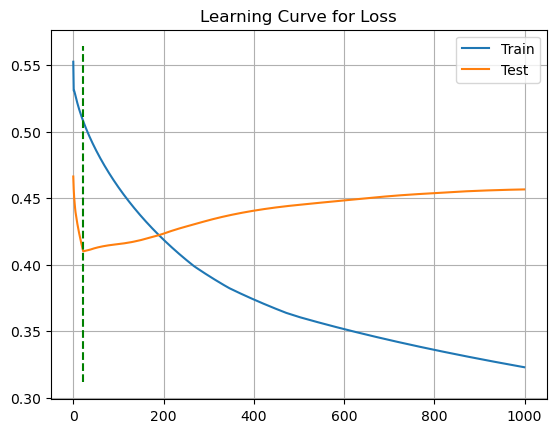

In [290]:
plt.plot(loss_train_hist, label='Train')
plt.plot(loss_test_hist, label='Test')

ymin, ymax = plt.ylim()
plt.vlines(best_epoch, ymin, ymax, color='g', linestyles='--')
plt.title('Learning Curve for Loss');
plt.legend()
plt.grid()

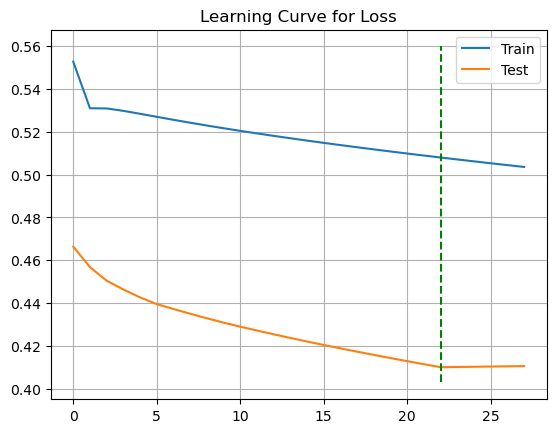

In [296]:
plt.plot(loss_train_hist, label='Train')
plt.plot(loss_test_hist, label='Test')

ymin, ymax = plt.ylim()
plt.vlines(best_epoch, ymin, ymax, color='g', linestyles='--')
plt.title('Learning Curve for Loss');
plt.legend()
plt.grid()

Text(0.5, 1.0, 'Overfit')

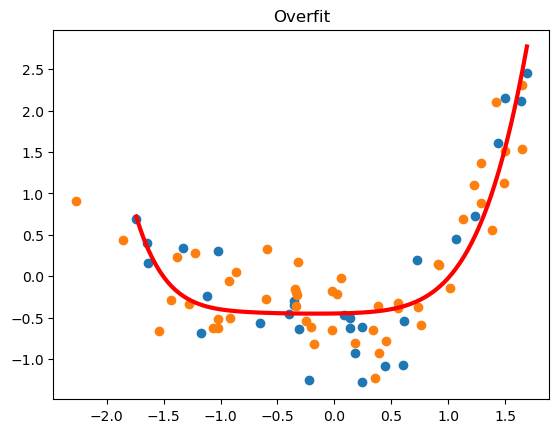

In [291]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial.transform(x)
y_hat = model.predict(xp)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x, y_hat, 'r', linewidth=3)
plt.title('Overfit')

Text(0.5, 1.0, 'Overfit')

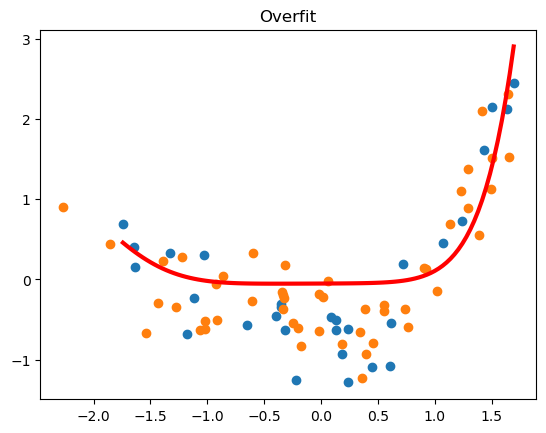

In [292]:
best_model = joblib.load('best-model')

x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial.transform(x)
y_hat = best_model.predict(xp)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x, y_hat, 'r', linewidth=3)
plt.title('Overfit')

### Sklearn

In [316]:
lr = 0.0005
d = 7

polynomial = PolynomialFeatures(degree=d)
model = SGDRegressor(eta0=lr, verbose=1, max_iter=100, random_state=2, early_stopping=True, validation_fraction=0.2)

x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.transform(x_test)
model.fit(x_train_poly, y_train.ravel())

-- Epoch 1
Norm: 0.05, NNZs: 8, Bias: 0.000201, T: 23, Avg. loss: 0.318099
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 8, Bias: -0.000427, T: 46, Avg. loss: 0.161382
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 8, Bias: -0.001381, T: 69, Avg. loss: 0.139404
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 8, Bias: -0.002292, T: 92, Avg. loss: 0.135351
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 8, Bias: -0.003210, T: 115, Avg. loss: 0.132652
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 8, Bias: -0.004098, T: 138, Avg. loss: 0.132093
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds


SGDRegressor(early_stopping=True, eta0=0.0005, max_iter=100, random_state=2,
             validation_fraction=0.2, verbose=1)

## **🔸 Regularization (Scratch)**

### Functions

In [83]:
def polynomial(x):
    phi_x = np.array([x**i for i in range(d+1)])
    phi_x = phi_x[..., 0].T
    return phi_x

In [84]:
def linear_regression(x, w):
    y_hat = x @ w
    return y_hat

In [85]:
def mse(y, y_hat):
    loss = np.mean((y - y_hat)**2)
    return loss

In [122]:
def regularization(w, mode='l2'):
    if mode == 'l2':
        norm = np.linalg.norm(w[1:], ord=2)**2
    return norm

In [123]:
def gradient(x, y, y_hat, w, alpha, mode='l2'):
    grads = 2*(x.T @ (y_hat - y)) / y.shape[0] 
    if mode == 'l2':
        grads[1:] += 2*alpha*w[1:]
    return grads

In [87]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

In [88]:
def mae(y, y_hat):
    loss = np.mean(np.abs(y - y_hat))
    return loss

In [89]:
def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

### Load Dataset

In [90]:
df = pd.read_csv('data/energy-train-s.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv('data/energy-test-s.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29, 1), (29, 1), (50, 1), (50, 1))

In [91]:
d = 7
phi_x_train = polynomial(x_train)
phi_x_test = polynomial(x_test)

phi_x_train.shape, phi_x_test.shape

((29, 8), (50, 8))

### Initialization

In [129]:
np.random.seed(15)
w = 0.1*np.random.randn(d+1, 1)
print(w)

eta = 0.0005
alpha = 2.0
n_epochs = 1500

[[-0.03123285]
 [ 0.03392847]
 [-0.01559085]
 [-0.05017897]
 [ 0.02355689]
 [-0.17636053]
 [-0.1095862 ]
 [-0.10877657]]


### Train

In [130]:
loss_train_hist, loss_test_hist = [], []
score_train_hist, score_test_hist = [], []
best_loss = np.inf

for epoch in range(n_epochs):
    # predictions
    y_hat = linear_regression(phi_x_train, w)
    
    # loss
    loss_train = mse(y_train, y_hat) + alpha*regularization(w, mode='l2')
    loss_train_hist.append(loss_train)  # loss train
    
    # gradients
    grads = gradient(phi_x_train, y_train, y_hat, w, alpha, mode='l2')
    
    # gradient descent
    w = gradient_descent(w, eta, grads)
    
    # evaluation
    y_hat_test = linear_regression(phi_x_test, w)
    loss_test = mse(y_hat_test, y_test)
    loss_test_hist.append(loss_test)  # loss test
    
    # early stopping
    if loss_test < best_loss:
        best_loss = loss_test
        w_best = w.copy()
        best_epoch = epoch
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t Loss_train={loss_train:.4},\t Loss_test={loss_test:.4}')

print(f'Model weights:\n {w_best.T[0]}')
print(f'Best epoch:{best_epoch}, Best loss:{best_loss}')

Epoch=99, 	 Loss_train=0.4113,	 Loss_test=0.8838
Epoch=199, 	 Loss_train=0.3716,	 Loss_test=0.4984
Epoch=299, 	 Loss_train=0.3435,	 Loss_test=0.3161
Epoch=399, 	 Loss_train=0.3229,	 Loss_test=0.2406
Epoch=499, 	 Loss_train=0.307,	 Loss_test=0.2195
Epoch=599, 	 Loss_train=0.2945,	 Loss_test=0.2245
Epoch=699, 	 Loss_train=0.2843,	 Loss_test=0.2407
Epoch=799, 	 Loss_train=0.2758,	 Loss_test=0.2603
Epoch=899, 	 Loss_train=0.2686,	 Loss_test=0.2797
Epoch=999, 	 Loss_train=0.2625,	 Loss_test=0.2973
Epoch=1099, 	 Loss_train=0.2572,	 Loss_test=0.3126
Epoch=1199, 	 Loss_train=0.2527,	 Loss_test=0.3255
Epoch=1299, 	 Loss_train=0.2488,	 Loss_test=0.3362
Epoch=1399, 	 Loss_train=0.2453,	 Loss_test=0.345
Epoch=1499, 	 Loss_train=0.2423,	 Loss_test=0.3524
Model weights:
 [-0.16698027  0.03306369  0.00904476  0.02875637  0.05666784  0.0048039
  0.05649606  0.02332994]
Best epoch:519, Best loss:0.21906693478303232


### Learning curve

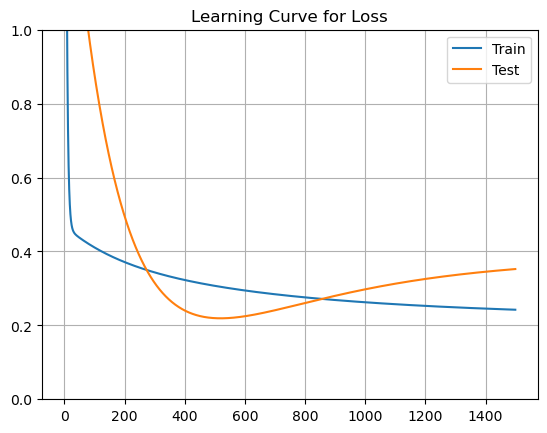

In [131]:
plt.plot(loss_train_hist, label='Train')
plt.plot(loss_test_hist, label='Test')

plt.legend()
plt.grid()
plt.ylim([0, 1])
plt.title('Learning Curve for Loss');

### Visualization

Text(0.5, 1.0, 'Overfit')

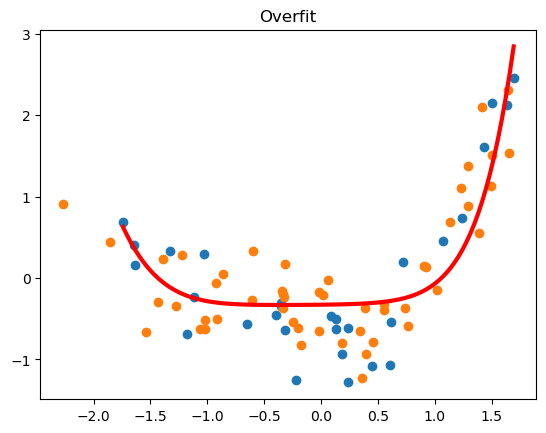

In [132]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial(x)
y_hat = linear_regression(xp, w)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x, y_hat, 'r', linewidth=3)
plt.title('Overfit')

In [133]:
w

array([[-0.32798434],
       [ 0.01748172],
       [ 0.03092952],
       [ 0.03825937],
       [ 0.06000641],
       [ 0.04315677],
       [ 0.06032468],
       [ 0.00921707]])

Text(0.5, 1.0, 'Overfit')

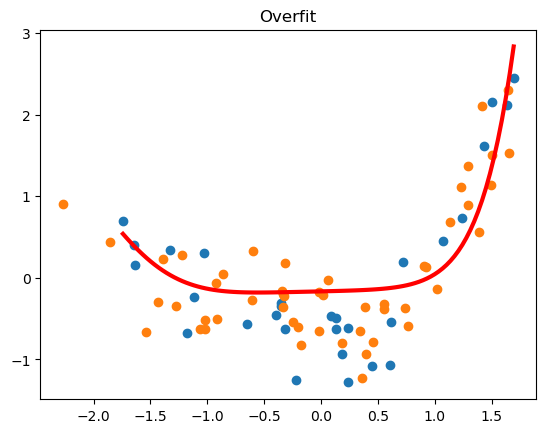

In [134]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial(x)
y_hat = linear_regression(xp, w_best)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x, y_hat, 'r', linewidth=3)
plt.title('Overfit')

## **🔸 Regularization (sklearn)**

In [138]:
df = pd.read_csv('data/energy-train-s.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv('data/energy-test-s.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29, 1), (29, 1), (50, 1), (50, 1))

In [151]:
lr = 0.001
alpha = 1e-3
r = 0.5
degree = 7

polynomial = PolynomialFeatures(degree=degree)
model = SGDRegressor(eta0=lr, penalty='elasticnet', alpha=alpha, l1_ratio=r, verbose=1)

# polynomial
x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.transform(x_test)

model.fit(x_train_poly, y_train.ravel())
model.score(x_test_poly, y_test)

-- Epoch 1
Norm: 0.06, NNZs: 8, Bias: -0.002557, T: 29, Avg. loss: 0.377696
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 8, Bias: -0.005787, T: 58, Avg. loss: 0.203525
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 8, Bias: -0.009170, T: 87, Avg. loss: 0.200082
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 8, Bias: -0.011991, T: 116, Avg. loss: 0.193908
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.08, NNZs: 8, Bias: -0.014751, T: 145, Avg. loss: 0.190989
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 8, Bias: -0.017450, T: 174, Avg. loss: 0.190815
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.08, NNZs: 8, Bias: -0.019812, T: 203, Avg. loss: 0.182850
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.08, NNZs: 8, Bias: -0.022184, T: 232, Avg. loss: 0.184052
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.08, NNZs: 8, Bias: -0.024417, T: 261, Avg. loss: 0.183889
Total training time: 0.00 seco

0.35712839032007837

Text(0.5, 1.0, 'Overfit')

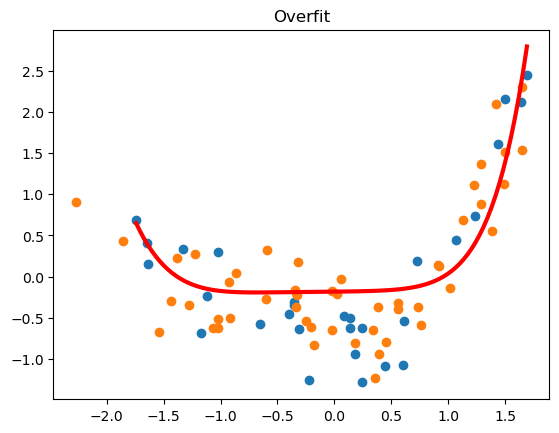

In [152]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial.transform(x)
y_hat = model.predict(xp)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x, y_hat, 'r', linewidth=3)
plt.title('Overfit')

## **🔸 Ridge, LASSO, ElasticNet (sklearn)**

In [154]:
df = pd.read_csv('data/energy-train-s.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv('data/energy-test-s.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29, 1), (29, 1), (50, 1), (50, 1))

In [189]:
lr = 0.005
alpha = 0.05
r = 0.5
degree = 7

polynomial = PolynomialFeatures(degree=degree)
# model = Ridge(alpha, solver='lsqr')
model = Lasso(alpha, max_iter=5000)

# polynomial
x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.transform(x_test)

model.fit(x_train_poly, y_train.ravel())
model.score(x_test_poly, y_test)

0.6882774595504983

In [184]:
model.coef_

array([ 0.        ,  0.        ,  0.29750815,  0.08204221,  0.17055326,
        0.0591397 , -0.        , -0.00248749])

In [ ]:
model.solver

Text(0.5, 1.0, 'Overfit')

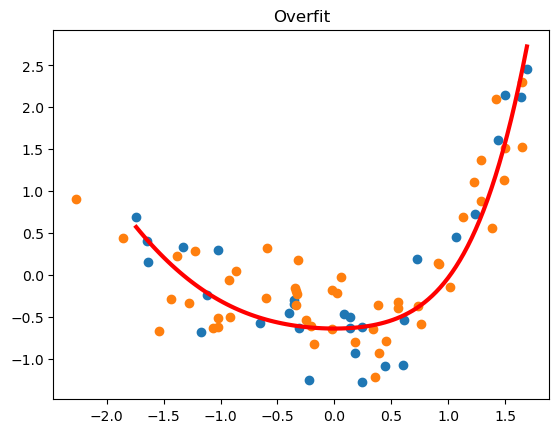

In [190]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial.transform(x)
y_hat = model.predict(xp)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x, y_hat, 'r', linewidth=3)
plt.title('Overfit')

## **🔸 Bias-Variance (mlxtend)**

In [15]:
df = pd.read_csv('data/energy-train-l.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv('data/energy-test-l.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1168, 1), (1168, 1), (292, 1), (292, 1))

In [34]:
polynomial = PolynomialFeatures(degree=25)

x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.fit_transform(x_test)

In [35]:
model = LinearRegression()

In [36]:
mse, bias, var = bias_variance_decomp(model, x_train_poly, y_train.ravel(), x_test_poly, y_test.ravel(), loss='mse', num_rounds=100, random_seed=2)
print(mse, bias, var, bias+var)

9.230630000648556 0.43598049780626685 8.79464950284229 9.230630000648556


### Exercise: implement bias-variance from scratch

In [ ]:
df = pd.read_csv('data/energy-train-l.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv('data/energy-test-l.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
for i in range(N):
    # Train subset selection
    x_train_sub, ... = train_test_split(..., train_size=0.1)
    
    # Polynomial transform
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train_sub)
    x_test_poly = poly.transform(x_test)
    
    # Train
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    
    # predict
    preds = model.predict(x_test_poly, y_test)
    
    # Append prediction
    all_preds[i, :] = preds.copy()


bias = ...
variance = ... 

print(bias, variance)

## **🔸 Cross Validation**

In [57]:
df = pd.read_csv('data/energy-train-l.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv('data/energy-test-l.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1168, 1), (1168, 1), (292, 1), (292, 1))

### Hold-out

In [197]:
x_train_s, x_valid, y_train_s, y_valid = train_test_split(x_train, y_train, test_size=0.2)
x_train_s.shape, x_valid.shape

((934, 1), (234, 1))

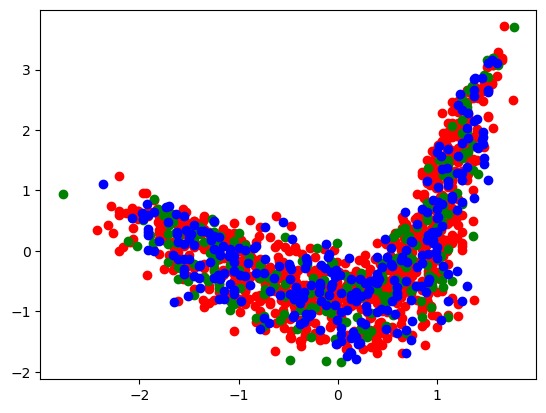

In [201]:
plt.scatter(x_train_s, y_train_s, c='r')
plt.scatter(x_valid, y_valid, c='g')
plt.scatter(x_test, y_test, c='b')

In [228]:
x_train_s, x_valid, y_train_s, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=5)

model = LinearRegression()
model.fit(x_train_s, y_train_s)
model.score(x_valid, y_valid)

0.13224874116364438

### K-fold

#### Simple example

In [299]:
X = np.array([[1, 2], 
              [3, 4], 
              [5, 6], 
              [7, 8]])

y = np.array([1, 2, 3, 4])

kf = KFold(2, shuffle=True, random_state=5)
list(kf.split(X))

for i, (train_idx, valid_idx) in enumerate(kf.split(X)):
    print(f'Fold {i}: \n Train:\n {X[train_idx], y[train_idx]}, \n Validation: \n{X[valid_idx], y[valid_idx]}\n')

Fold 0: 
 Train:
 (array([[5, 6],
       [7, 8]]), array([3, 4])), 
 Validation: 
(array([[1, 2],
       [3, 4]]), array([1, 2]))

Fold 1: 
 Train:
 (array([[1, 2],
       [3, 4]]), array([1, 2])), 
 Validation: 
(array([[5, 6],
       [7, 8]]), array([3, 4]))



#### Real Data

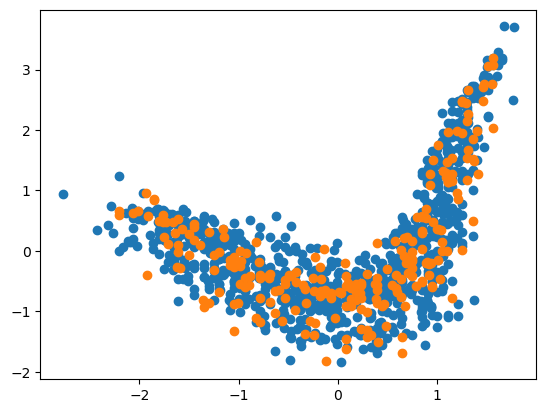

In [317]:
kf = KFold(5, shuffle=True, random_state=5)

list_kf = list(kf.split(x_train))
plt.scatter(x_train[list_kf[0][0]], y_train[list_kf[0][0]])
plt.scatter(x_train[list_kf[0][1]], y_train[list_kf[0][1]])

In [318]:
scores = []

for i, (train_idx, valid_idx) in enumerate(kf.split(x_train)):
    # train subset
    x_train_s, y_train_s = x_train[train_idx], y_train[train_idx]
    # validation
    x_valid, y_valid = x_train[valid_idx], y_train[valid_idx]
    
    model = LinearRegression()
    model.fit(x_train_s, y_train_s)
    
    scores.append(model.score(x_valid, y_valid))

scores = np.array(scores)
print(scores.mean(), scores.std())

0.10587827002821464 0.054651015714819014


### LOO

#### Simple example

In [326]:
X = np.array([[1, 2], 
              [3, 4], 
              [5, 6], 
              [7, 8]])

y = np.array([1, 2, 3, 4])

loo = LeaveOneOut()
list(loo.split(X))

for i, (train_idx, valid_idx) in enumerate(loo.split(X)):
    print(f'Fold {i}: \n Train:\n {X[train_idx], y[train_idx]}, \n Validation: \n{X[valid_idx], y[valid_idx]}\n')

Fold 0: 
 Train:
 (array([[3, 4],
       [5, 6],
       [7, 8]]), array([2, 3, 4])), 
 Validation: 
(array([[1, 2]]), array([1]))

Fold 1: 
 Train:
 (array([[1, 2],
       [5, 6],
       [7, 8]]), array([1, 3, 4])), 
 Validation: 
(array([[3, 4]]), array([2]))

Fold 2: 
 Train:
 (array([[1, 2],
       [3, 4],
       [7, 8]]), array([1, 2, 4])), 
 Validation: 
(array([[5, 6]]), array([3]))

Fold 3: 
 Train:
 (array([[1, 2],
       [3, 4],
       [5, 6]]), array([1, 2, 3])), 
 Validation: 
(array([[7, 8]]), array([4]))



#### Real Data

In [ ]:
loo = ...

polynomial = ...

scores = []
for i, (train_idx, valid_idx) in enumerate(...):
    # train subset
    ...
    # validation
    ...
    
    x_train_s_poly = ...
    x_valid_poly = ...
    
    model = ...
    model.fit(...)
    model.score(...)

scores = np.array(scores)
print(scores.mean(), scores.std())

In [ ]:
# retrain the model
x_train

In [ ]:
# evaulate with the test set
x_test

### RidgeCV

In [74]:
model = RidgeCV(alphas=(100., 10., 1.0, 0.1, 0.01, 0.001), scoring='r2', cv=10)
model.fit(x_train, y_train)

RidgeCV(alphas=(100.0, 10.0, 1.0, 0.1, 0.01, 0.001), cv=10, scoring='r2')

In [71]:
model.alpha_

10.0

In [72]:
model = Ridge(alpha=10.)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.11981616645788595

### store_cv_values

In [75]:
model = RidgeCV(alphas=(100., 10., 1.0, 0.1, 0.01, 0.001), scoring='r2', store_cv_values=True)
model.fit(x_train, y_train)

RidgeCV(alphas=(100.0, 10.0, 1.0, 0.1, 0.01, 0.001), scoring='r2',
        store_cv_values=True)

In [88]:
model.cv_values_.shape, model.cv_values_[:, 0, 0]

((1168, 1, 6),
 array([0.14998307, 0.26381088, 0.20251546, ..., 0.1402462 , 0.17264265,
        0.0260637 ]))

## **🔸 Hyperparameter Tuning**

In [123]:
df = pd.read_csv('data/energy-train-l.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv('data/energy-test-l.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1168, 1), (1168, 1), (292, 1), (292, 1))

### Grid Search

In [124]:
polynomial = PolynomialFeatures(degree=3)

x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.fit_transform(x_test)

In [125]:
model = SGDRegressor(random_state=2)

In [144]:
lrs = np.logspace(-3, 0, 10)
alphas = np.logspace(-6, 0, 10)

param_grid = {'eta0': lrs, 'alpha': alphas}
search = GridSearchCV(model, param_grid, verbose=0, return_train_score=True)

search.fit(x_train_poly, y_train.ravel())

GridSearchCV(estimator=SGDRegressor(random_state=2),
             param_grid={'alpha': array([1.00000000e-06, 4.64158883e-06, 2.15443469e-05, 1.00000000e-04,
       4.64158883e-04, 2.15443469e-03, 1.00000000e-02, 4.64158883e-02,
       2.15443469e-01, 1.00000000e+00]),
                         'eta0': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])},
             return_train_score=True)

In [139]:
search.best_estimator_.score(x_test_poly, y_test)

0.6985168737495981

In [142]:
search.best_index_, search.best_params_, search.best_score_

(2, {'alpha': 1e-06, 'eta0': 0.004641588833612777}, 0.7085245157472255)

In [149]:
df_cv = pd.DataFrame(search.cv_results_)
df_cv = df_cv.sort_values(by='rank_test_score')
df_cv[['params', 'rank_test_score', 'mean_train_score', 'mean_test_score']]

,params,rank_test_score,mean_train_score,mean_test_score
2,"{'alpha': 1e-06, 'eta0': 0.004641588833612777}",1,7.122789e-01,7.085245e-01
12,"{'alpha': 4.641588833612782e-06, 'eta0': 0.004...",2,7.122786e-01,7.085242e-01
22,"{'alpha': 2.1544346900318823e-05, 'eta0': 0.00...",3,7.122772e-01,7.085229e-01
32,"{'alpha': 0.0001, 'eta0': 0.004641588833612777}",4,7.122708e-01,7.085166e-01
42,"{'alpha': 0.00046415888336127773, 'eta0': 0.00...",5,7.122407e-01,7.084873e-01
...,...,...,...,...
19,"{'alpha': 4.641588833612782e-06, 'eta0': 1.0}",96,-5.781310e+21,-6.073673e+21
9,"{'alpha': 1e-06, 'eta0': 1.0}",97,-2.725867e+22,-2.749525e+22
39,"{'alpha': 0.0001, 'eta0': 1.0}",98,-4.469671e+22,-4.356081e+22
69,"{'alpha': 0.01, 'eta0': 1.0}",99,-7.631622e+22,-4.896849e+22


### Random Search

In [153]:
polynomial = PolynomialFeatures(degree=3)

x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.fit_transform(x_test)

In [154]:
model = SGDRegressor(random_state=2)

In [165]:
lrs = np.logspace(-3, 0, 100)
alphas = np.logspace(-6, 0, 100)

param_distr = {'eta0': lrs, 'alpha': alphas}
search = RandomizedSearchCV(model, param_distr, verbose=1, n_iter=100, random_state=35)

search.fit(x_train_poly, y_train.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=SGDRegressor(random_state=2), n_iter=100,
                   param_distributions={'alpha': array([1.00000000e-06, 1.14975700e-06, 1.32194115e-06, 1.51991108e-06,
       1.74752840e-06, 2.00923300e-06, 2.31012970e-06, 2.65608778e-06,
       3.05385551e-06, 3.51119173e-06, 4.03701726e-06, 4.64158883e-06,
       5.33669923e-06, 6.13590727e-06, 7.05480231e-06, 8.11130831e-06,
       9.326...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ])},
                   random_state=35, verbose=1)

In [166]:
search.best_estimator_

SGDRegressor(alpha=1.873817422860383e-05, eta0=0.01519911082952934,
             random_state=2)

In [163]:
search.best_score_

0.710035329849091

In [164]:
search.best_estimator_.score(x_test_poly, y_test)

0.6998604359725551

### Proposed method!

In [191]:
polynomial = PolynomialFeatures(degree=3)

x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.fit_transform(x_test)

In [192]:
model = SGDRegressor(random_state=2)

In [193]:
lrs = np.logspace(-3, 0, 100)
alphas = np.logspace(-6, 0, 100)

param_distr = {'eta0': lrs, 'alpha': alphas}
search = RandomizedSearchCV(model, param_distr, verbose=1, n_iter=100, random_state=35)

search.fit(x_train_poly, y_train.ravel())
search.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


0.710035329849091

In [194]:
lr, alpha = search.best_params_.values()
lr, alpha

(0.01519911082952934, 1.873817422860383e-05)

In [197]:
lrs = np.linspace(lr-0.01, lr+0.02, 100)

param_grid = {'eta0': lrs}
search = GridSearchCV(model, param_grid)
search.fit(x_train_poly, y_train.ravel())

search.best_score_, search.best_params_

(0.7101938514071146, {'eta0': 0.013986989617408126})

## **🔸 Final**

### Load Train/Test 

In [160]:
df = pd.read_csv('data/energy-train-l.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv('data/energy-test-l.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1168, 1), (1168, 1), (292, 1), (292, 1))

### Define Model

In [161]:
degree = 4
polynomial = PolynomialFeatures(degree=degree)
model = SGDRegressor(random_state=31)

In [162]:
x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.transform(x_test)

### Hyper-parameter Tuning

#### Hyper-parameters

In [163]:
lrs = np.logspace(-3, 0, 50)
alphas = np.logspace(-6, 0, 50)
param_distr = {'eta0': lrs, 'alpha': alphas}

In [144]:
lrs, alphas

(array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
        0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
        0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.00719686,
        0.00828643, 0.00954095, 0.01098541, 0.01264855, 0.01456348,
        0.01676833, 0.01930698, 0.02222996, 0.02559548, 0.02947052,
        0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
        0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
        0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
        0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
        0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ]),
 array([1.00000000e-06, 1.32571137e-06, 1.75751062e-06, 2.32995181e-06,
        3.08884360e-06, 4.09491506e-06, 5.42867544e-06, 7.19685673e-06,
        9.54095476e-06, 1.26485522e-05, 1.67683294e-05, 2.22299648e-05,
        2.94705170e-05, 3.90693994e-05, 5.17947468e-05, 6.86648845e-05,
        9.10298178e-05, 1.2067

#### Coarse grid

In [164]:
random_search = RandomizedSearchCV(model, param_distr, n_iter=250, random_state=31)
random_search.fit(x_train_poly, y_train.ravel())

random_search.best_params_, random_search.best_score_

({'eta0': 0.008286427728546842, 'alpha': 1.325711365590108e-06},
 0.709712668413154)

#### Fine grid

In [165]:
lr, alpha = random_search.best_params_.values()

d1, d2 = 0.1, 0.1
lrs = np.r_[np.linspace((1-d1)*lr, (1+d1)*lr, 50), lr]
alphas = np.r_[np.linspace((1+d2)*alpha, (1+d2)*alpha, 50), alpha]

param_grid = {'eta0': lrs, 'alpha': alphas}

In [166]:
grid_search = GridSearchCV(model, param_grid)
grid_search.fit(x_train_poly, y_train.ravel())

grid_search.best_params_, grid_search.best_score_

({'alpha': 1.325711365590108e-06, 'eta0': 0.009115070501401527},
 0.7108457954153533)

### Retrain Model

In [167]:
model = grid_search.best_estimator_

#### Visualize

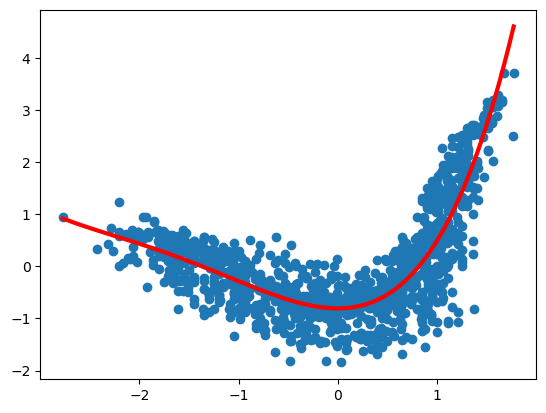

In [168]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial.transform(x)
y_hat = model.predict(xp)

plt.scatter(x_train, y_train)
plt.plot(x, y_hat, 'r', linewidth=3)

### Final Evaluation

In [169]:
model.score(x_test_poly, y_test)

0.6999975635651177

#### Visualize

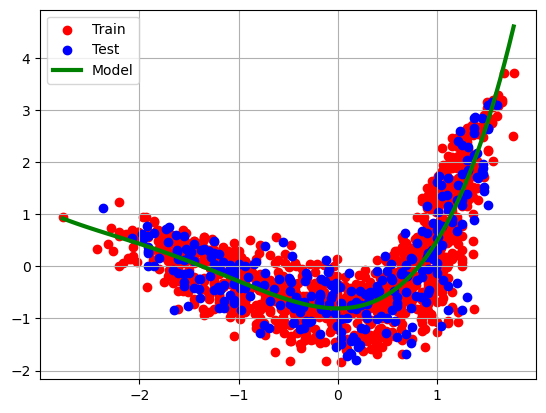

In [178]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial.transform(x)
y_hat = model.predict(xp)

plt.scatter(x_train, y_train, c='r')
plt.scatter(x_test, y_test, c='b')
plt.plot(x, y_hat, 'g', linewidth=3)

plt.grid()
plt.legend(['Train', 'Test', 'Model'])